Solving logistic Units like based On Traveling Salesman problem

In [2]:
%pip install  matplotlib deap


Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from deap import creator, algorithms , tools, base
import random 

In [2]:
num_locations = 10

locations =[
    (random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)
]
print(locations)
depot = (50,50)
num_vehicles = 3


[(42, 33), (34, 99), (67, 70), (72, 6), (38, 82), (54, 6), (95, 15), (70, 71), (62, 29), (5, 21)]


# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


In [4]:
toolsbox = base.Toolbox()
toolsbox.register("indices",random.sample, range(num_locations),num_locations)
toolsbox.register("individual", tools.initIterate, creator.Individual, toolsbox.indices)
toolsbox.register("population", tools.initRepeat, list, toolsbox.individual)
print(toolsbox.individual())

[6, 7, 9, 2, 3, 0, 4, 1, 8, 5]


In [5]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # print(vehicle_route)
        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[j]) - np.array(vehicle_route[j + 1]))


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances) 
    # print(total_distance)# Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolsbox.register("evaluate", evalVRP)


In [6]:
toolsbox.register("mate", tools.cxOrdered)
toolsbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolsbox.register("select", tools.selNSGA2)
# toolsbox.register("select", tools.)
# toolsbox.register("select", tools.selTournament, tournsize=3)

In [7]:
def plot_routes(individual,title="vehicle_route"):
    plt.figure()
    for (x,y) in locations:
        plt.plot(x,y, 'ko')         
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), 'b-')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

            

In [ ]:
def main():
    random.seed(32)
    pop = toolsbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    
    pop, log = algorithms.eaSimple(pop, toolsbox, 0.7, 0.2, 300, stats=stats, halloffame=hof, verbose=True)
    logbook.record(gen=0, nevals=len(pop), **stats.compile(pop))
    
    for gen in range(1, 300 + 1):
        pop, log = algorithms.eaSimple(pop, toolsbox, 0.7, 0.2, 1, stats=stats, halloffame=hof, verbose=False)
        logbook.record(gen=gen, nevals=len(pop), **stats.compile(pop))
    
    plot_routes(hof[0], "Optimal Routes")
    
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    
    plt.figure()
    plt.plot(gen, fit_mins, label="Minimum Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Score of the Best Individual Over Generations")
    plt.legend()
    plt.show()
    
    return pop, stats, hof

if __name__ == "__main__":
    main()

gen	nevals	avg    	min    
0  	300   	328.727	1.89478
1  	227   	331.28 	3.15055
2  	225   	327.959	3.15055
3  	228   	330.546	4.40288
4  	220   	327.816	3.85735
5  	234   	325.23 	0.695533
6  	231   	324.164	2.51881 
7  	232   	327.652	2.51881 
8  	227   	327.458	5.57718 
9  	214   	327.607	2.79477 
10 	224   	328.101	2.40281 


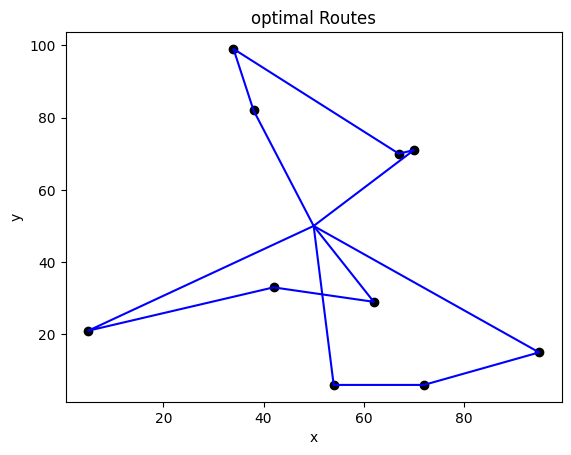

In [8]:
def main():
    random.seed(32)
    pop = toolsbox.population(n=300)
    hof =tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind:ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min",np.min)
    
    algorithms.eaSimple(pop, toolsbox , 0.7,0.2,10,stats=stats,halloffame=hof)
    
    plot_routes(hof[0],"optimal Routes")
    return pop , stats, hof
if __name__ == "__main__":
    main()